D:\OneDrive - Cardiff University\05 - Python\00 - other
D:
OneDrive - Cardiff University
D:\OneDrive - Cardiff University\


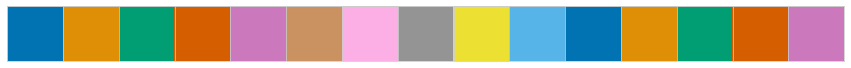

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import calendar
from pandas.tseries import offsets
from datetime import date
from datetime import datetime
import matplotlib.ticker as tkr
import math
import sys
import os

%matplotlib inline  

season_dict = {"Winter":1, "Spring":2, "Summer":3, 'High Summer':4, "Autumn":5}

sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "png"
dpi = 600
figsize = (12, 6.5)
figsize_map = (3, 3)
sns.palplot(sns.color_palette())

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "OneDrive - Cardiff University":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

In [80]:
path = computer_path+r"04 - Projects\99 - Misc\03 - Lac kivu"
filename = "campagne_2010_Halbwachs_BRUT_0-364_Prof_Conductivite.xls"

In [81]:
df = pd.read_excel(path+os.path.sep+filename)
df.columns = ["Depth", "Conductivity"]
df.sort_values("Depth", inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head(20)

(65442, 2)


,Depth,Conductivity
0,0.000,0.000710
1,0.000,0.000766
2,0.000,0.000626
3,0.002,0.000794
4,0.004,0.000794
5,0.004,0.000710
6,0.004,0.000710
7,0.004,0.000710
8,0.004,0.000710
9,0.004,0.000710


In [82]:
df.describe()

,Depth,Conductivity
count,65442.000000,65442.000000
mean,264.735053,4.279275
std,118.986604,1.633510
min,0.000000,0.000626
25%,172.937500,2.687474
50%,327.859000,5.528880
75%,363.979000,5.593822
max,364.023000,5.601254


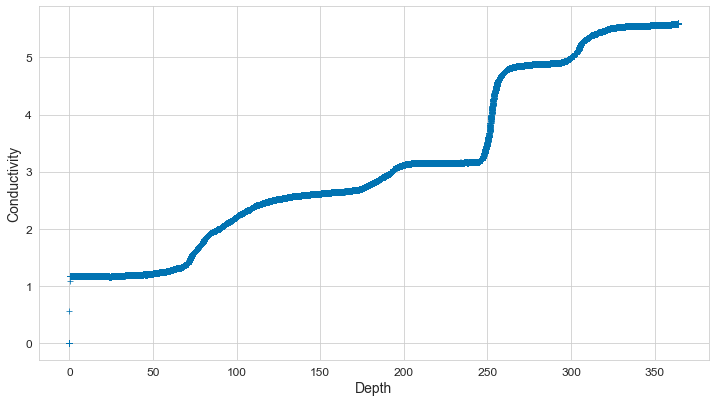

In [83]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x="Depth", y="Conductivity", data=df,marker='+')

## Methode brute

In [84]:
# Do the average of the conductivity for each depth value
df_mean = df.groupby("Depth").mean()
df_mean.reset_index(inplace=True)
df_mean.head()

,Depth,Conductivity
0,0.000,0.000701
1,0.002,0.000794
2,0.004,0.000722
3,0.006,0.000752
4,0.008,0.000729


In [85]:
df_mean.describe()

,Depth,Conductivity
count,34202.000000,34202.000000
mean,195.333625,3.351421
std,107.046803,1.541983
min,0.000000,0.000701
25%,104.259750,2.285897
50%,200.792000,3.127759
75%,289.772750,4.899990
max,364.023000,5.601114


In [86]:
df_mean["Gradient"]=(df_mean["Conductivity"].shift(1)-df_mean["Conductivity"])/(df_mean["Depth"].shift(1)-df_mean["Depth"])
df_mean["Gradient"].fillna(0, inplace=True)
df_mean.head(20)

,Depth,Conductivity,Gradient
0,0.000,0.000701,0.000000
1,0.002,0.000794,0.046667
2,0.004,0.000722,-0.036000
3,0.006,0.000752,0.015000
4,0.008,0.000729,-0.011667
5,0.015,0.000710,-0.002667
6,0.051,0.570814,15.836222
7,0.136,1.081838,6.012047
8,0.202,1.179101,1.473682
9,0.261,1.179367,0.004508


Text(0, 0.5, 'Gradient')

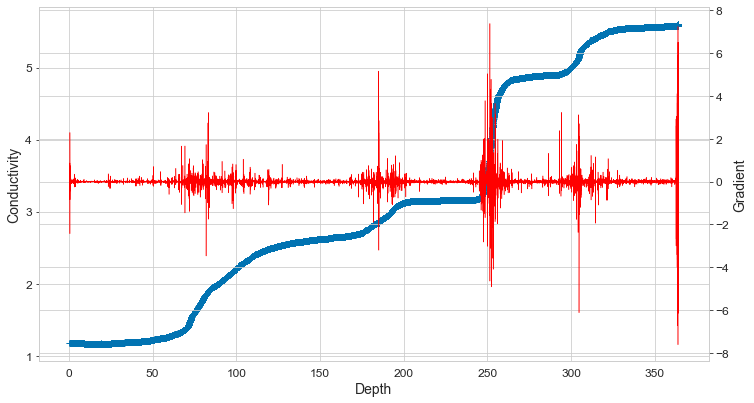

In [87]:
fig, ax = plt.subplots(figsize=figsize)
ax2 = ax.twinx()
#not plotting from the start as there is a peak at index 6-9
df_to_plot = df_mean.iloc[10:].copy()
sns.scatterplot(x="Depth", y="Conductivity", data=df_to_plot,marker='+', ax=ax)
ax2.plot(df_to_plot["Depth"].values, df_to_plot["Gradient"].values, color='red', linewidth=0.5, label="Gradient")
ax2.set_ylabel("Gradient")

In [88]:
## if the gradient can't be negative

Text(0, 0.5, 'Gradient')

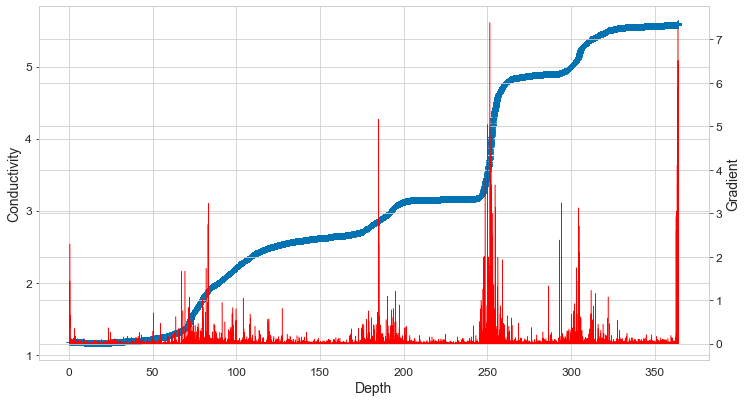

In [89]:
df_mean.loc[df_mean["Gradient"]<0, "Gradient"]=0

fig, ax = plt.subplots(figsize=figsize)
ax2 = ax.twinx()
df_to_plot = df_mean.iloc[10:].copy()
sns.scatterplot(x="Depth", y="Conductivity", data=df_to_plot,marker='+', ax=ax)
ax2.plot(df_to_plot["Depth"].values, df_to_plot["Gradient"].values, color='red', linewidth=0.5, label="Gradient")
ax2.set_ylabel("Gradient")

## Methode brute avec un peu de smoothing

In [90]:
# Smoothing
df_mean["Conductivity"] = df_mean["Conductivity"].rolling(window=6, center=True, min_periods=1).mean()

# Calculation of the gradient
df_mean["Gradient"]=(df_mean["Conductivity"].shift(1)-df_mean["Conductivity"])/(df_mean["Depth"].shift(1)-df_mean["Depth"])
df_mean["Gradient"].fillna(0, inplace=True)

Text(0, 0.5, 'Gradient')

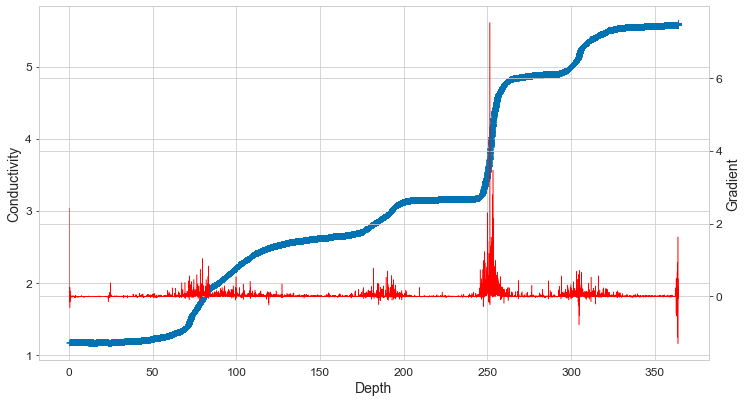

In [91]:

fig, ax = plt.subplots(figsize=figsize)
ax2 = ax.twinx()
df_to_plot = df_mean.iloc[10:].copy()
sns.scatterplot(x="Depth", y="Conductivity", data=df_to_plot,marker='+', ax=ax)
ax2.plot(df_to_plot["Depth"].values, df_to_plot["Gradient"].values, color='red', linewidth=0.5, label="Gradient")
ax2.set_ylabel("Gradient")